<a href="https://colab.research.google.com/github/shristii05/ML_Project/blob/main/Random_Forest_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
url="https://raw.githubusercontent.com/ajaychouhan-nitbhopal/Drug-Classification-with-Random-forest-Classifier-on-Drug200-dataset/refs/heads/main/(2)%20drug200.csv"
df=pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


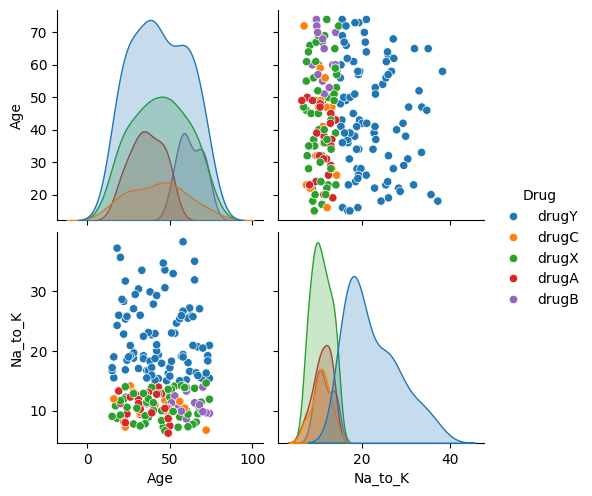

In [3]:
df.info()
df.describe()
sns.pairplot(df, hue='Drug')
plt.show()

In [4]:
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
categorical_features = ['Sex', 'BP', 'Cholesterol']
encoder = OneHotEncoder()
X_train_new=encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_new=encoder.transform(X_test[categorical_features]).toarray()
X_train_new=pd.DataFrame(X_train_new,columns=encoder.get_feature_names_out(categorical_features))

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_new, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test_new)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5
Classification Report:
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.33      0.33      0.33         3
       drugC       0.50      0.20      0.29         5
       drugX       0.65      1.00      0.79        11
       drugY       0.39      0.47      0.42        15

    accuracy                           0.50        40
   macro avg       0.37      0.40      0.37        40
weighted avg       0.41      0.50      0.44        40



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

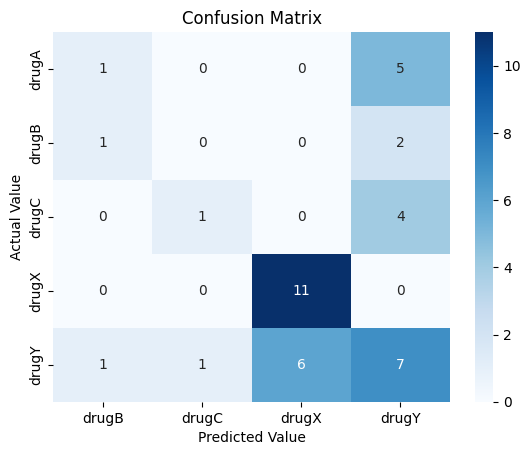

In [8]:
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

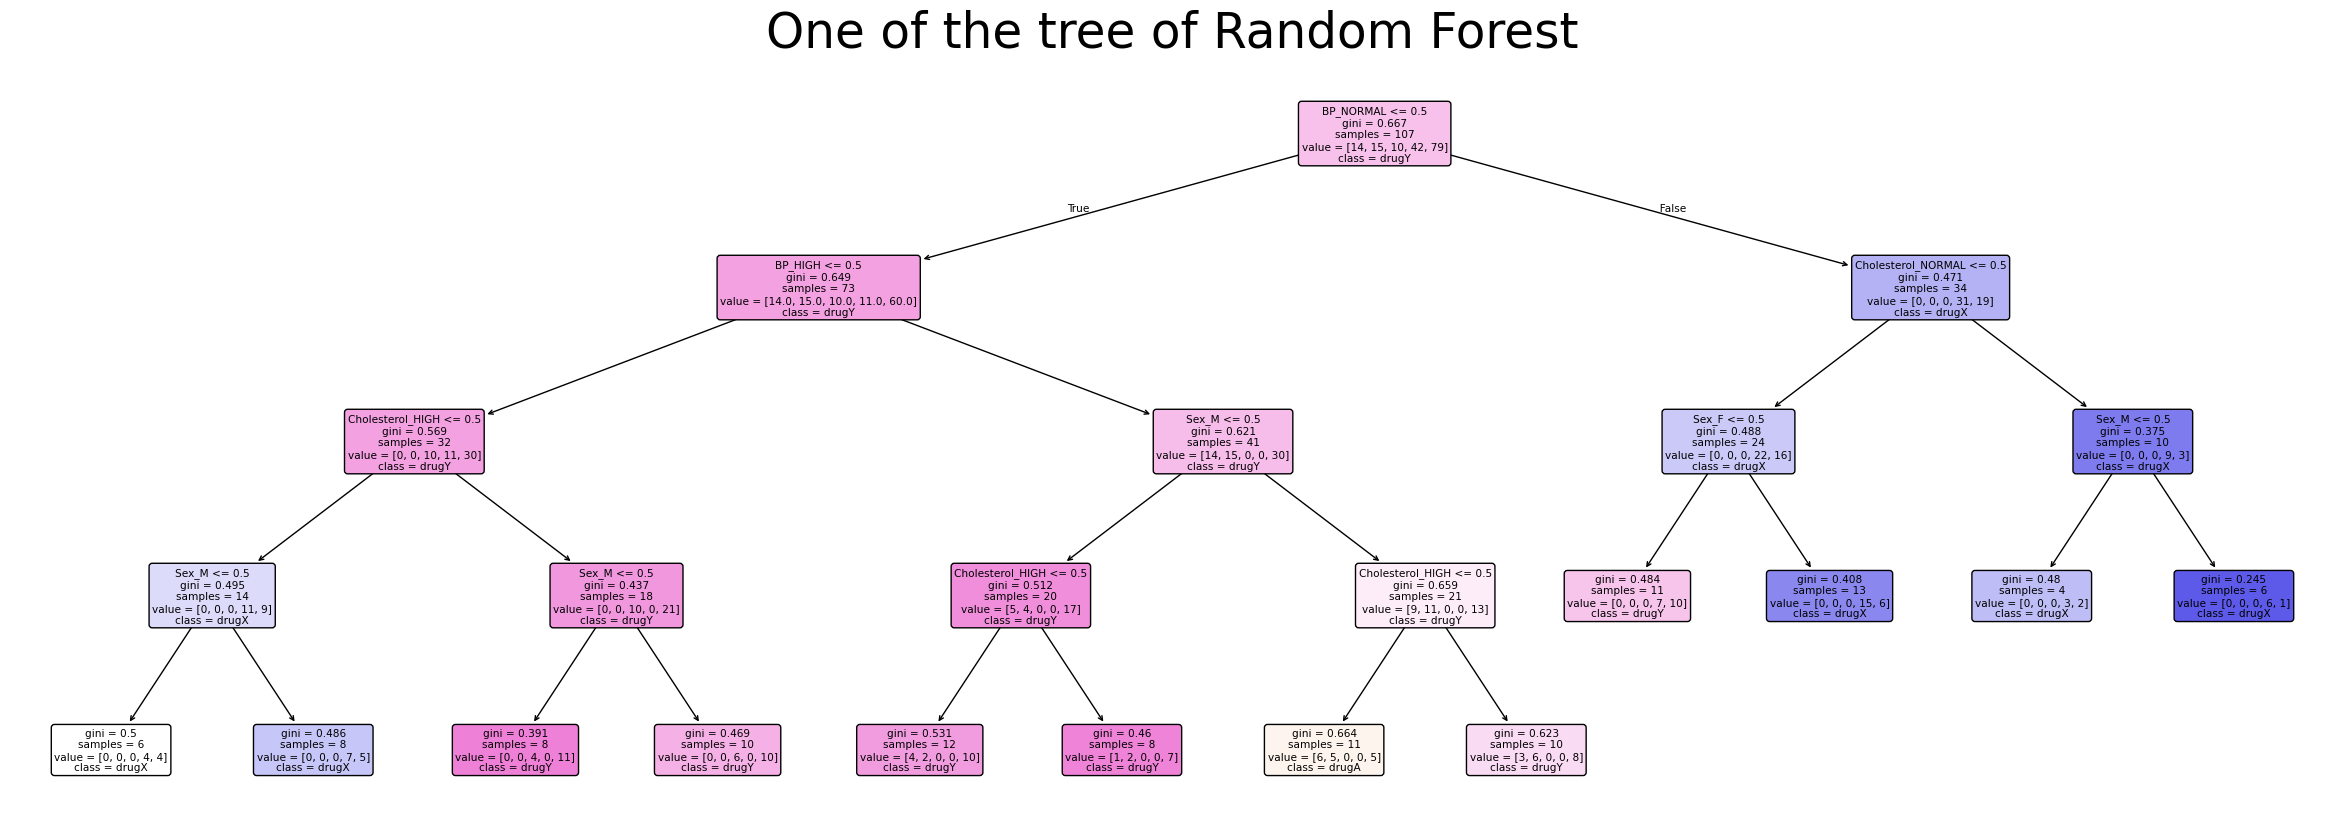

In [9]:
# To plot the 1st tree:
plt.figure(figsize=(30,10))
plot_tree(model.estimators_[0], feature_names=X_train_new.columns, class_names=model.classes_, filled=True,
          rounded=True)
plt.title("One of the tree of Random Forest", fontsize=35)
plt.show()

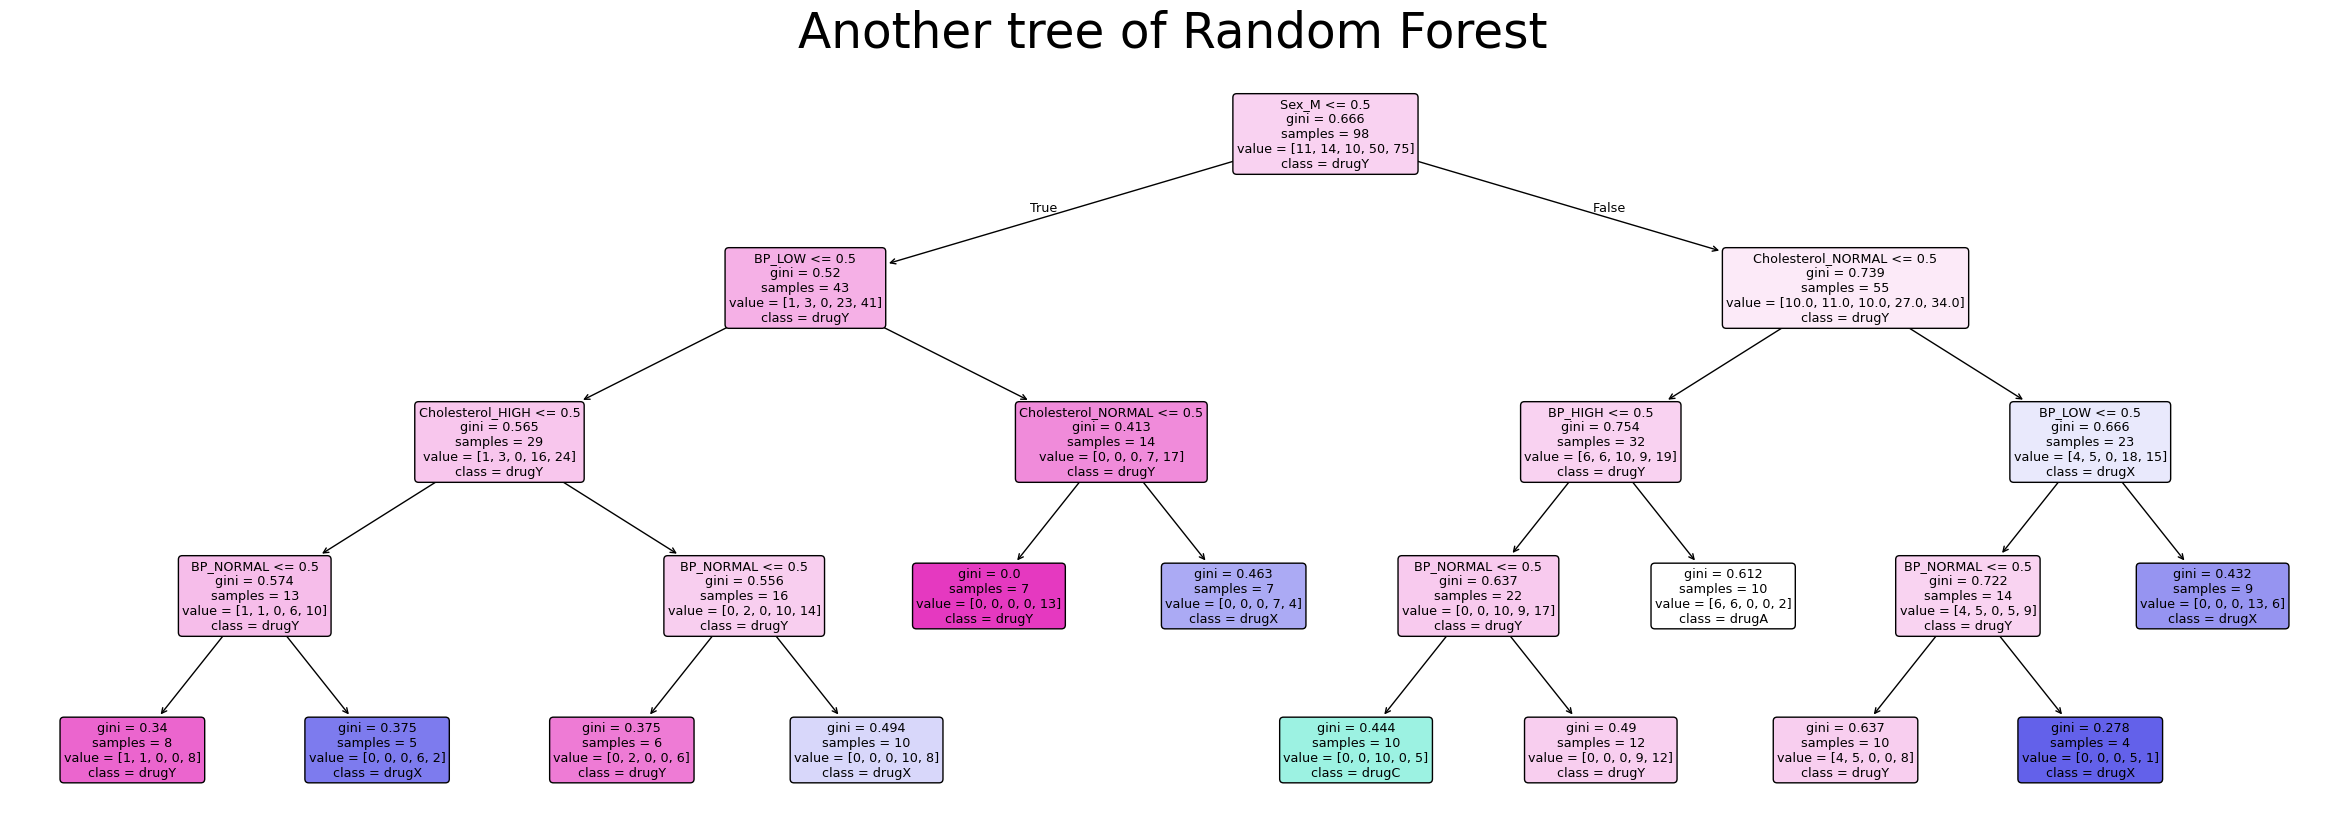

In [11]:
# To plot the 5th tree:
plt.figure(figsize=(30,10))
plot_tree(model.estimators_[4], feature_names=X_train_new.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Another tree of Random Forest", fontsize=35)
plt.show()


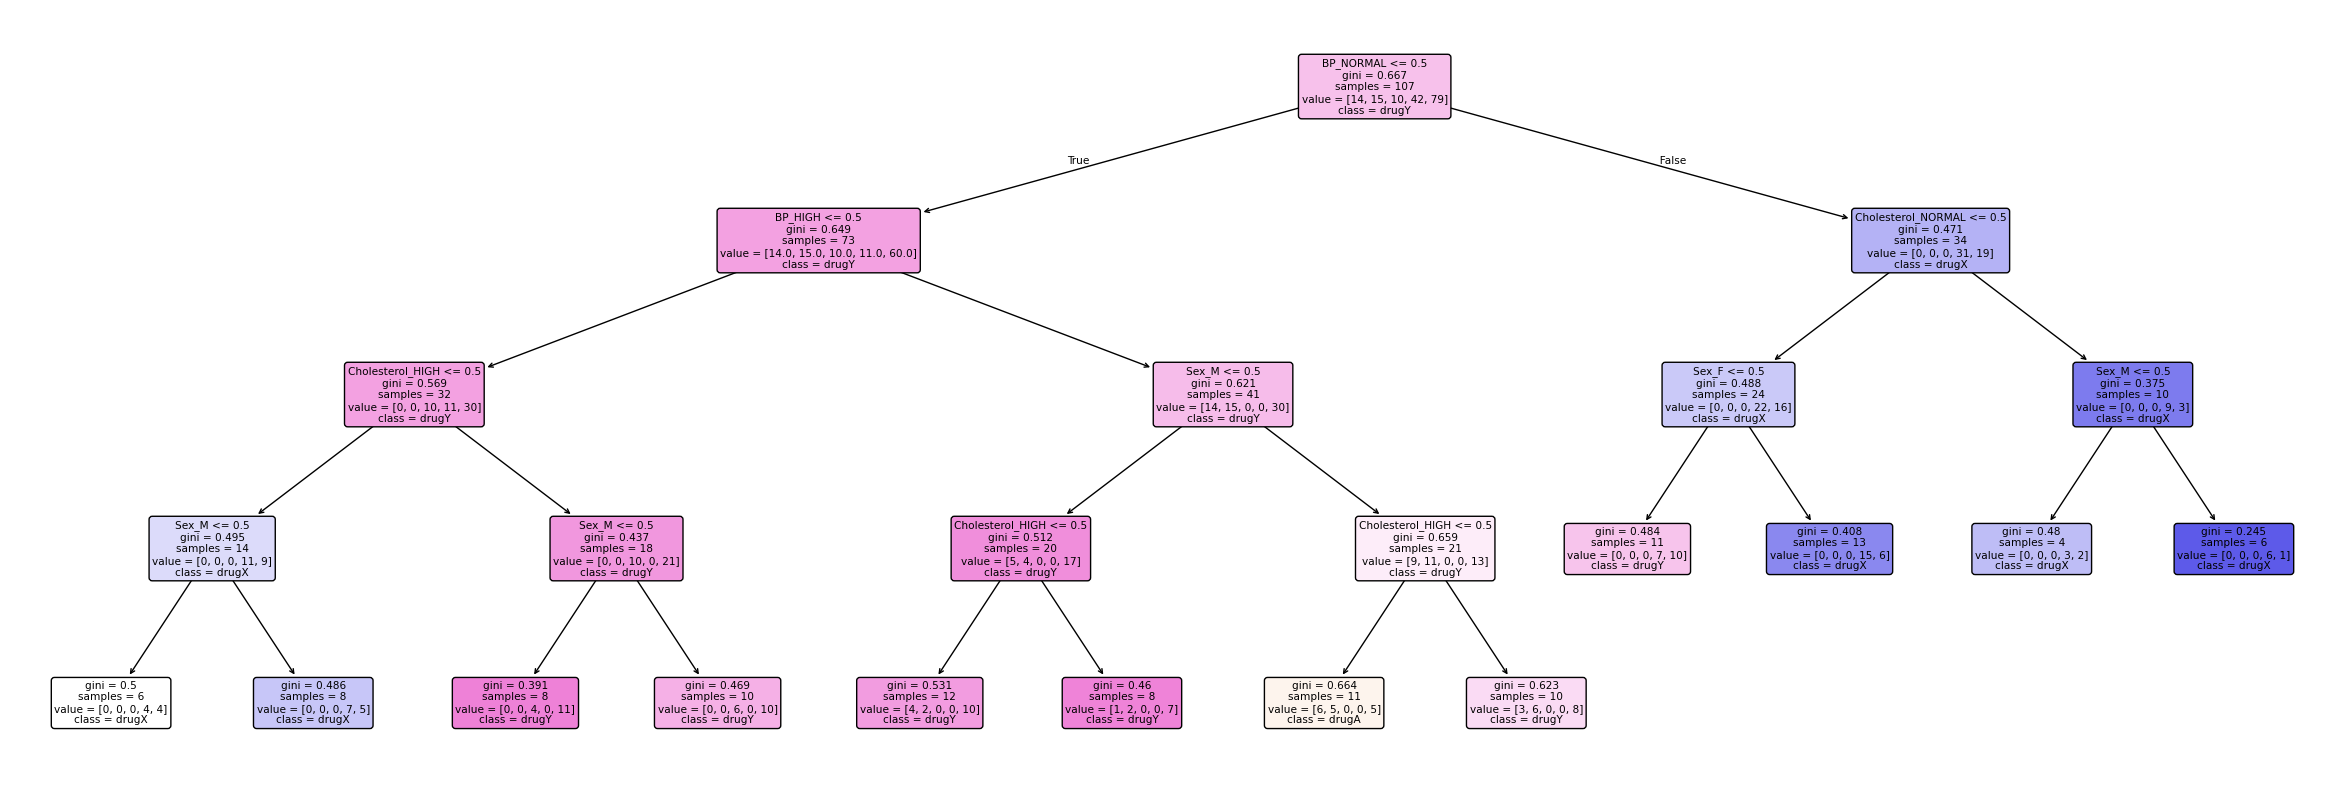

In [12]:
plt.figure(figsize=(30,10))
plot_tree(model.estimators_[0], feature_names=X_train_new.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()
